## Data loading and Preperation

In [12]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import re
import numpy as np
from bs4 import BeautifulSoup
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from collections import Counter
from gensim import corpora
from gensim.models import LdaModel, CoherenceModel
from gensim.corpora import Dictionary


# the following codes are adapted from this kaggle project https://www.kaggle.com/code/youssef22ashraf/reddit-sentiment-analysis-israel-palestine-war/comments
# which is written by Youssef22Ashraf and Abdelrhman Salah

In [2]:
df = pd.read_csv("weibo_reddit_dataset/reddit_opinion_PSE_ISR.csv")

In [3]:
df['created_time'] = pd.to_datetime(df['created_time'])

start_date = "2023-10-07"
end_date = "2023-11-07"

filtered_df = df[(df['created_time'] >= start_date) & (df['created_time'] <= end_date)]

print(filtered_df)

        comment_id  score                                          self_text  \
1647860    k857c4c      3  Would you be able to post links to the indepen...   
1647861    k857b4l     13  Of course it's important. Until the 20th centu...   
1647862    k857amm      1  ISW, the conservative think tank representing ...   
1647863    k8579mi      1  ###[View link](https://rapidsave.com/info?url=...   
1647864    k8578wh     14  I find it extremely unlikely that these specia...   
...            ...    ...                                                ...   
1692677    k3syo3g      2        do you have a link? i can’t find it, please   
1692678    k3sr2ik      3                                         Preach on!   
1692679    k3snslt     69  What I find terrifying is how many people were...   
1692680    k3snhzv     32  The scary thing is that they torture clearly d...   
1692681    k3slvs4      7                                  Very much indeed.   

                  subreddit        crea

/var/folders/n2/l02636fd7q11j3gyvhqqs5v80000gn/T/ipykernel_71992/2929444707.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['date'] = filtered_df['created_time'].dt.date


date
2023-10-07     128
2023-10-08     293
2023-10-09     462
2023-10-10     561
2023-10-11     323
2023-10-12     478
2023-10-13     363
2023-10-14     318
2023-10-15     324
2023-10-16     334
2023-10-17     992
2023-10-18    1359
2023-10-19    1099
2023-10-20     638
2023-10-21     697
2023-10-22     794
2023-10-23     907
2023-10-24    1023
2023-10-25     376
2023-10-26     930
2023-10-27    1595
2023-10-28    1975
2023-10-29    1788
2023-10-30    3249
2023-10-31    2991
2023-11-01    3164
2023-11-02    3925
2023-11-03    3319
2023-11-04    2329
2023-11-05    3420
2023-11-06    4668
dtype: int64


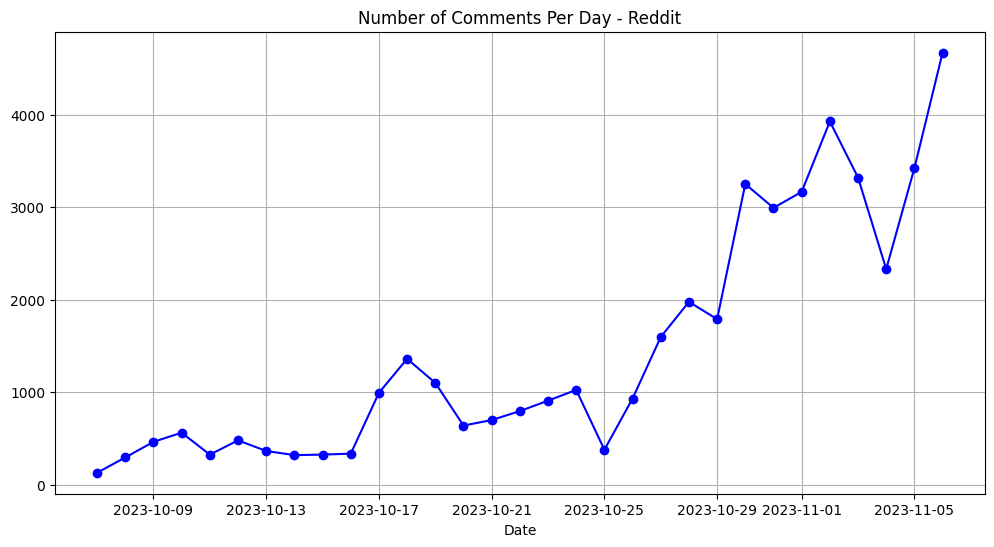

In [4]:
# line plot of the number of comments day by day
import matplotlib.pyplot as plt

filtered_df['date'] = filtered_df['created_time'].dt.date

daily_comments = filtered_df.groupby('date').size()

print(daily_comments)


# Create a line plot
plt.figure(figsize=(12, 6))
plt.plot(daily_comments.index, daily_comments.values, marker='o', linestyle='-', color='b')

# Add labels and title
plt.xlabel('Date')
#plt.ylabel('Number of Comments')
plt.title('Number of Comments Per Day - Reddit')
plt.grid(True)

# Display the plot
plt.show()

In [26]:
# Download the WordNet corpora using NLTK
#nltk.download('wordnet')

# Optionally, download other related resources if needed
# nltk.download('omw-1.4')  # Open Multilingual WordNet for multi-language support

print("WordNet and related corpora have been downloaded successfully.")


WordNet and related corpora have been downloaded successfully.


In [6]:
# Download necessary NLTK resources if not already installed
#nltk.download('punkt')
#nltk.download('stopwords')

# Initialize the lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def clean_text(text):
    if not isinstance(text, str):  # Ensure the input is a string
        return ''
    
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    
    # Remove HTML tags
    soup = BeautifulSoup(text, 'html.parser')
    text = soup.get_text()
    
    # Remove special characters and lowercase the text
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text).lower()
    
    # Tokenization
    tokens = word_tokenize(text)
    
    # Lemmatization and removing stopwords
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]
    
    # Join the tokens back into a sentence
    #cleaned_text = ' '.join(tokens)
    
    return tokens

filtered_df['tokens'] = filtered_df['self_text'].apply(clean_text)
filtered_df['clean_text'] = filtered_df['tokens'].apply(lambda x: ' '.join(x))


/var/folders/n2/l02636fd7q11j3gyvhqqs5v80000gn/T/ipykernel_71992/3535975052.py:17: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, 'html.parser')
/var/folders/n2/l02636fd7q11j3gyvhqqs5v80000gn/T/ipykernel_71992/3535975052.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['tokens'] = filtered_df['self_text'].apply(clean_text)
/var/folders/n2/l02636fd7q11j3gyvhqqs5v80000gn/T/ipykernel_71992/3535975052.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:

In [7]:
# Convert all comments to string (if they are not already)
filtered_df['clean_text'] = filtered_df['clean_text'].astype(str)


# Check for empty strings
print((filtered_df['clean_text'] == '').sum())

# Drop rows where 'clean_text' is an empty string
filtered_df = filtered_df[filtered_df['clean_text'] != '']



483


/var/folders/n2/l02636fd7q11j3gyvhqqs5v80000gn/T/ipykernel_71992/3701608745.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['clean_text'] = filtered_df['clean_text'].astype(str)


In [11]:
# Define a normalization function
def normalize_text(text):
    # Replace synonyms or variations with a standard term
    text = text.replace('israeli', 'israel')
    text = text.replace('palestinian', 'palestine')
    return text

def tokenize(text):

    tokens = word_tokenize(text)
    
    return tokens

# Apply normalization to the 'content' column
filtered_df['normalized_content'] = filtered_df['clean_text'].apply(normalize_text)
filtered_df['nom_tokens'] = filtered_df['normalized_content'].apply(tokenize)

## Vader sentiment analysis

In [30]:
#nltk.download('vader_lexicon')

# Initialize SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Declare variables for scores
scores = {
    "Compound": [],
    "Positive": [],
    "Negative": [],
    "Neutral": []
}

# Generate sentiment scores for comments
for comment in filtered_df['clean_text']:
    scores_dict = analyzer.polarity_scores(comment)
    scores["Compound"].append(scores_dict.get("compound", float('nan')))
    scores["Positive"].append(scores_dict.get("pos", float('nan')))
    scores["Negative"].append(scores_dict.get("neg", float('nan')))
    scores["Neutral"].append(scores_dict.get("neu", float('nan')))

# Create a new DataFrame for sentiment scores
sentiments_score = pd.DataFrame(scores)

# Reset index of both DataFrames to ensure proper alignment
filtered_df.reset_index(drop=True, inplace=True)
sentiments_score.reset_index(drop=True, inplace=True)

# Join the sentiment scores DataFrame with the original DataFrame
filtered_df = pd.concat([filtered_df, sentiments_score], axis=1)

# Optionally, print out the DataFrame to check results
# print(filtered_df.head())


  comment_id  score                                          self_text  \
0    k857c4c      3  Would you be able to post links to the indepen...   
1    k857b4l     13  Of course it's important. Until the 20th centu...   
2    k857amm      1  ISW, the conservative think tank representing ...   
3    k8579mi      1  ###[View link](https://rapidsave.com/info?url=...   
4    k8578wh     14  I find it extremely unlikely that these specia...   

            subreddit        created_time  post_id           author_name  \
0     IsraelPalestine 2023-11-06 23:59:53  17p73rm  Alive_Collection_454   
1     IsraelPalestine 2023-11-06 23:59:41  17pdtfd      kawaii_war_dandy   
2     IsraelPalestine 2023-11-06 23:59:36  17p76sb          Having_A_Day   
3  NonCredibleDefense 2023-11-06 23:59:24  17obtsm             SaveVideo   
4       CombatFootage 2023-11-06 23:59:16  17p7mfx         what-the-puck   

   controversiality  ups  downs  ...    post_created_time        date  \
0                 0    3 

In [31]:
mean = filtered_df['Compound'].mean()
median = filtered_df['Compound'].median()
print(mean, median)

-0.08895595525383973 0.0


In [32]:
conditions = [
    (filtered_df['Compound'] <= -0.05),
    (filtered_df['Compound'] > -0.05) & (filtered_df['Compound'] < 0.05),
    (filtered_df['Compound'] >= 0.05)
]

# Define corresponding values for each condition
values = ['Negative', 'Neutral', 'Positive']

# Create a new column 'Category' using np.select to assign values based on the conditions
filtered_df['Category'] = np.select(conditions, values)

In [33]:
# Group by sentiment category
grouped_df = filtered_df.groupby('Category')

# Count of entries in each sentiment category
sentiment_counts = grouped_df.size()
print(sentiment_counts)


grouped_df_as_df = grouped_df.size().reset_index(name='counts')

# Save the result as a CSV file
grouped_df_as_df.to_csv('results/reddit_en_sentiment_statistics.csv', index=False)

Category
Negative    19043
Neutral     10836
Positive    14460
dtype: int64


In [9]:
# Flatten the list of tokens into a single list
all_tokens = [token for sublist in filtered_df['tokens'] for token in sublist]

# Calculate word frequencies using Counter
word_freq = Counter(all_tokens)

# Calculate the total number of tokens
total_tokens = sum(word_freq.values())

# Convert the word frequency dictionary into a DataFrame
word_freq_df = pd.DataFrame(word_freq.items(), columns=['word', 'frequency'])

# Calculate the relative frequency and add it to the DataFrame
word_freq_df['relative_frequency'] = word_freq_df['frequency'] / total_tokens

# Sort by frequency (optional)
word_freq_df = word_freq_df.sort_values(by='frequency', ascending=False)

# Export to CSV
word_freq_df.to_csv('results/en_reddit_word_frequency_0.csv', index=False)

# Display the top 10 words with their frequencies and relative frequencies (optional)
print(word_freq_df.head(10))

            word  frequency  relative_frequency
80        israel       7851            0.011836
136        hamas       7594            0.011449
23        people       7263            0.010950
65          like       5514            0.008313
198         dont       4462            0.006727
0          would       3969            0.005984
93   palestinian       3792            0.005717
204          one       3713            0.005598
25           war       3089            0.004657
250          get       3054            0.004604


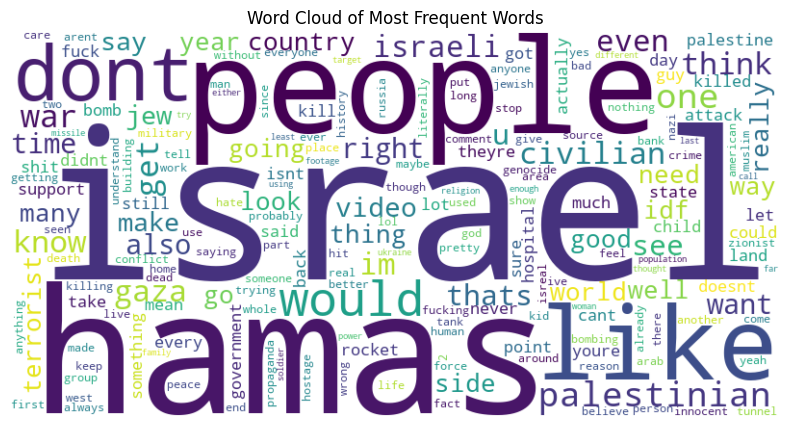

In [10]:
# Generate the word cloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='viridis', 
    max_words=200
).generate_from_frequencies(word_freq)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axis
plt.title('Word Cloud of Most Frequent Words')
plt.show()


## LDA topic modeling

In [37]:
# Create a dictionary and corpus for the LDA model
dictionary = corpora.Dictionary(filtered_df['nom_tokens'])
corpus = [dictionary.doc2bow(text) for text in filtered_df['nom_tokens']]

def compute_coherence_perplexity_values(corpus, dictionary, start, limit, step):
    coherence_values = []
    perplexity_values = []
    model_list = []
    
    for num_topics in range(start, limit, step):
        # Train the LDA model
        lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=15)
        model_list.append(lda_model)
        
        # Compute Coherence
        coherence_model_lda = CoherenceModel(model=lda_model, texts=filtered_df['nom_tokens'], dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherence_model_lda.get_coherence())
        
        # Calculate Perplexity
        log_perplexity = lda_model.log_perplexity(corpus)
        perplexity = np.exp(-log_perplexity)
        perplexity_values.append(perplexity)
    
    return model_list, coherence_values, perplexity_values

# Set the range for the number of topics
start, limit, step = 2, 14, 1
model_list, coherence_values, perplexity_values = compute_coherence_perplexity_values(corpus, dictionary, start, limit, step)

# Print coherence and perplexity for each model
for num_topics, coherence, perplexity in zip(range(start, limit, step), coherence_values, perplexity_values):
    print(f'Number of Topics: {num_topics}, Coherence Value: {coherence}, Perplexity: {perplexity}')

# Locate the optimal model based on coherence
optimal_idx = coherence_values.index(max(coherence_values))
optimal_model = model_list[optimal_idx]
optimal_num_topics = range(start, limit, step)[optimal_idx]

print(f'\nOptimal Number of Topics: {optimal_num_topics}')
print(f'Optimal Coherence Value: {max(coherence_values)}')
print(f'Perplexity at Optimal Number of Topics: {perplexity_values[optimal_idx]}')


Number of Topics: 2, Coherence Value: 0.7047946328354103, Perplexity: 3331.284148220106
Number of Topics: 3, Coherence Value: 0.6949759478532594, Perplexity: 3413.5644213571777
Number of Topics: 4, Coherence Value: 0.6969710485807715, Perplexity: 3554.5510508228585
Number of Topics: 5, Coherence Value: 0.5521632145528695, Perplexity: 3872.747080329788
Number of Topics: 6, Coherence Value: 0.5799373178000399, Perplexity: 4094.3801790275925
Number of Topics: 7, Coherence Value: 0.5445470833163114, Perplexity: 4370.876311398202
Number of Topics: 8, Coherence Value: 0.5629844870064736, Perplexity: 4877.855044144404
Number of Topics: 9, Coherence Value: 0.5063796295157109, Perplexity: 5667.539362110584
Number of Topics: 10, Coherence Value: 0.5489059532385306, Perplexity: 7085.142434949736
Number of Topics: 11, Coherence Value: 0.5512174141182444, Perplexity: 9728.003652791362
Number of Topics: 12, Coherence Value: 0.5593800215196881, Perplexity: 13977.996770685106
Number of Topics: 13, Coh

In [112]:
# create and train LDA model
num_topics = 6

dictionary = corpora.Dictionary(filtered_df['nom_tokens'])
corpus = [dictionary.doc2bow(text) for text in filtered_df['nom_tokens']]
lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=15)


for idx, topic in lda_model.print_topics(num_words=10):
    print(f'Topic: {idx + 1} : {topic}\n')

Topic: 1 : 0.026*"people" + 0.017*"dont" + 0.014*"like" + 0.010*"think" + 0.010*"know" + 0.009*"im" + 0.009*"get" + 0.009*"one" + 0.008*"side" + 0.008*"thing"

Topic: 2 : 0.018*"like" + 0.012*"one" + 0.010*"look" + 0.010*"time" + 0.008*"year" + 0.008*"video" + 0.008*"get" + 0.007*"see" + 0.007*"got" + 0.007*"first"

Topic: 3 : 0.037*"palestine" + 0.036*"israel" + 0.019*"jew" + 0.015*"country" + 0.014*"land" + 0.013*"state" + 0.010*"year" + 0.010*"jewish" + 0.009*"people" + 0.008*"american"

Topic: 4 : 0.045*"hamas" + 0.039*"israel" + 0.017*"civilian" + 0.016*"gaza" + 0.015*"palestine" + 0.010*"terrorist" + 0.009*"war" + 0.008*"attack" + 0.008*"would" + 0.008*"idf"

Topic: 5 : 0.016*"russia" + 0.013*"ukraine" + 0.009*"thank" + 0.008*"team" + 0.008*"lmao" + 0.006*"used" + 0.006*"china" + 0.006*"drone" + 0.006*"use" + 0.006*"iran"

Topic: 6 : 0.019*"video" + 0.011*"post" + 0.010*"source" + 0.008*"news" + 0.008*"please" + 0.008*"let" + 0.007*"reddit" + 0.007*"provided" + 0.007*"bot" + 0.00

In [120]:
import numpy as np
import pandas as pd

# Initialize an array to hold the topic proportions
topic_proportions = np.zeros(num_topics)
# Initialize a counter array to count documents with each topic as dominant
topic_document_counts = np.zeros(num_topics)

# Calculate the topic distribution across all documents
for bow in corpus:
    doc_topics = lda_model.get_document_topics(bow, minimum_probability=0)
    # Determine the dominant topic for the current document
    dominant_topic_index = max(doc_topics, key=lambda x: x[1])[0]
    
    # Increment the count for the dominant topic
    topic_document_counts[dominant_topic_index] += 1
    
    # Update topic proportions
    for topic_num, prop in doc_topics:
        topic_proportions[topic_num] += prop

# Normalize the proportions
topic_proportions /= len(corpus)

# Create a DataFrame to display the topics and their proportions and counts
data = {
    "Topic #": [f"Topic #{i + 1}" for i in range(num_topics)],
    "Proportion": topic_proportions,
    "Document Count": topic_document_counts,
}

df_t = pd.DataFrame(data)

# Save the DataFrame to a CSV file
df_t.to_csv('results/en_reddit_lda_topics.csv', index=False)

# Display the table
print(df_t)

    Topic #  Proportion  Document Count
0  Topic #1    0.312985         17279.0
1  Topic #2    0.162648          7050.0
2  Topic #3    0.129636          4650.0
3  Topic #4    0.212604         10260.0
4  Topic #5    0.076873          2227.0
5  Topic #6    0.105253          2873.0


In [113]:
def get_word_index(word):
    return dictionary.token2id.get(word)

israel_word_index = get_word_index('israel')
palestine_word_index = get_word_index('palestine')

if israel_word_index is not None:
    topic_term_distribution = lda_model.get_topics()
    israel_topic_index = topic_term_distribution[:, israel_word_index].argmax()
    print(f"'Israel'  Topic #{israel_topic_index + 1}")

if palestine_word_index is not None:
    topic_term_distribution = lda_model.get_topics()
    palestine_topic_index = topic_term_distribution[:, palestine_word_index].argmax()
    print(f"'Palestine' Topic #{palestine_topic_index + 1}")

'Israel'  Topic #4
'Palestine' Topic #3


In [114]:
# after word replacement

from gensim.corpora import Dictionary
from gensim.models import LdaModel

# Function to get the topic distribution for each row
def get_topic_distribution(row):
    bow = dictionary.doc2bow(row['nom_tokens'])  # Use the tokenized 'tokens' column
    return lda_model.get_document_topics(bow, minimum_probability=0)

# Apply the function to calculate topic distribution for each document
filtered_df['topic_distribution'] = filtered_df.apply(get_topic_distribution, axis=1)


# Function to determine geopolitical stance based on sentiment score and topic distribution
def determine_geopolitical_stance(row):
    sentiment_score = row['Compound']
    topic_distribution = row['topic_distribution']  # Use the pre-computed topic distribution
    
    # Ensure that topic_distribution is a list of tuples
    if not isinstance(topic_distribution, list) or len(topic_distribution) == 0:
        return 'Neutral/Stance Not Clear'
    
    # Find the most relevant topic index (highest probability)
    dominant_topic_index = max(topic_distribution, key=lambda x: x[1])[0]  # x[1] is the probability, x[0] is the topic index
    
    # Determine stance based on sentiment score and dominant topic
    if sentiment_score <= -0.05 and dominant_topic_index == israel_topic_index:
        return 'Against Israel'
    elif sentiment_score <= -0.05 and dominant_topic_index == palestine_topic_index:
        return 'Against Palestine'
    elif sentiment_score >= 0.05 and dominant_topic_index == israel_topic_index:
        return 'Supports Israel'
    elif sentiment_score >= 0.05 and dominant_topic_index == palestine_topic_index:
        return 'Supports Palestine'
    else:
        return 'Neutral/Stance Not Clear'

# Apply the function to determine geopolitical stances for each document
filtered_df['geopolitical_stance'] = filtered_df.apply(determine_geopolitical_stance, axis=1)


In [119]:
# Group the DataFrame by 'geopolitical_stance'
grouped_df = filtered_df.groupby('geopolitical_stance')
# Count the number of entries for each geopolitical stance
count_per_stance = grouped_df.size()
print(count_per_stance)

geopolitical_stance
Against Israel               5738
Against Palestine            1844
Neutral/Stance Not Clear    32715
Supports Israel              2627
Supports Palestine           1415
dtype: int64


## Further exploration

In [117]:
# try more words here

# Function to get the topic index for a specific word
def get_word_topic_index(word, lda_model, dictionary):
    word_index = dictionary.token2id.get(word)
    if word_index is not None:
        topic_term_distribution = lda_model.get_topics()
        # Find the topic with the highest probability for this word
        return topic_term_distribution[:, word_index].argmax()
    return None

# Function to extract sentiment scores for documents belonging to a particular topic
def get_sentiment_scores_by_topic(df, topic_index):
    # Filter documents where the given topic has the highest probability
    topic_docs = df[df['dominant_topic'] == topic_index]
    return topic_docs['Compound']

# Function to determine the dominant topic for each document
def determine_dominant_topic(row):
    topic_distribution = row['topic_distribution']
    if not topic_distribution:
        return None
    # Find the most relevant topic index (highest probability)
    return max(topic_distribution, key=lambda x: x[1])[0]  # x[1] is the probability, x[0] is the topic index

# Apply the function to determine dominant topics for each document
filtered_df['dominant_topic'] = filtered_df.apply(determine_dominant_topic, axis=1)

# Get topic indices for specific words : feel free to try here
word_to_examine = 'israel'
topic_index_1 = get_word_topic_index(word_to_examine, lda_model, dictionary)

# Compute sentiment scores for documents related to specific topics
if topic_index_1 is not None:
    israel_docs = filtered_df[filtered_df['dominant_topic'] == topic_index_1]
    israel_sentiment_scores = get_sentiment_scores_by_topic(israel_docs, topic_index_1)
    print(f"Sentiment scores for documents related to the word '{word_to_examine}' (Topic #{topic_index_1 + 1}):")
    print(israel_sentiment_scores.describe())  # Summary statistics

Sentiment scores for documents related to the word 'israel' (Topic #4):
count    10249.000000
mean        -0.235799
std          0.524080
min         -0.999100
25%         -0.709600
50%         -0.250000
75%          0.077200
max          0.986000
Name: Compound, dtype: float64
